In [1]:
import pandas as pd

titanic_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial'+\
                                    '/master/dataset/titanic.xls'
titanic = pd.read_excel(titanic_url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [2]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic['sex'])
titanic['gender'] = le.transform(titanic['sex'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


In [3]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body,gender
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000,1309.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.644003
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922,0.478997
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000,1.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
gender       1309 non-null int64
dtypes: float64(3), int64(5), object(7)
memory usage: 153.5+ KB


In [5]:
titanic = titanic[titanic['age'].notnull()]
titanic = titanic[titanic['fare'].notnull()]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 15 columns):
pclass       1045 non-null int64
survived     1045 non-null int64
name         1045 non-null object
sex          1045 non-null object
age          1045 non-null float64
sibsp        1045 non-null int64
parch        1045 non-null int64
ticket       1045 non-null object
fare         1045 non-null float64
cabin        272 non-null object
embarked     1043 non-null object
boat         417 non-null object
body         119 non-null float64
home.dest    685 non-null object
gender       1045 non-null int64
dtypes: float64(3), int64(5), object(7)
memory usage: 130.6+ KB


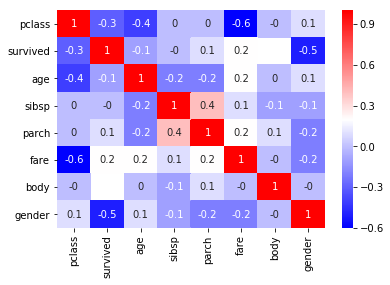

In [6]:
import seaborn as sns

correlation_matrix = titanic.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr')

In [0]:
y = titanic['survived']
X = titanic[['pclass','age','sibsp','parch','fare','gender']]

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 6 columns):
pclass    1045 non-null int64
age       1045 non-null float64
sibsp     1045 non-null int64
parch     1045 non-null int64
fare      1045 non-null float64
gender    1045 non-null int64
dtypes: float64(2), int64(4)
memory usage: 57.1 KB


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
                    train_test_split(X, y, test_size=0.2, random_state=13)

In [10]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=13, solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=13, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
from sklearn.metrics import accuracy_score

pred = log_reg.predict(X_train)
accuracy_score(y_train, pred)

0.7906698564593302

In [12]:
pred = log_reg.predict(X_test)
accuracy_score(y_test, pred)

0.7511961722488039

In [13]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
SS.fit(X)

X_ss = SS.transform(X)

X_train, X_test, y_train, y_test = \
                    train_test_split(X_ss, y, test_size=0.2, random_state=13)

log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=13, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
pred = log_reg.predict(X_train)
print("Train Acc : ", accuracy_score(y_train, pred))

pred = log_reg.predict(X_test)
print("Test Acc : ", accuracy_score(y_test, pred))

Train Acc :  0.7930622009569378
Test Acc :  0.7559808612440191


In [15]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = \
                    train_test_split(X, y, test_size=0.2, random_state=13)

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=13)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=13, splitter='best')

In [16]:
pred = tree_clf.predict(X_train)
print("Train Acc : ", accuracy_score(y_train, pred))

pred = tree_clf.predict(X_test)
print("Test Acc : ", accuracy_score(y_test, pred))

Train Acc :  0.7942583732057417
Test Acc :  0.7559808612440191


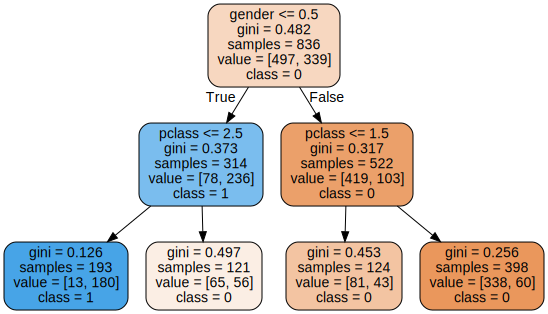

In [17]:
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(tree_clf, feature_names=X.columns,
                       class_names=['0','1'],
                       rounded=True, filled=True))

In [18]:
X.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender'], dtype='object')

In [30]:
import numpy as np

dicaprio = np.array([3, 19, 0, 0, 5, 1]).reshape(1, -1)
dicaprio_ss = SS.transform(dicaprio)
log_reg.predict_proba(dicaprio_ss)

array([[0.86116334, 0.13883666]])

In [20]:
tree_clf.predict_proba(dicaprio)

array([[0.84924623, 0.15075377]])

In [26]:
winslet = np.array([1, 17, 1, 2, 100, 0]).reshape(1, -1)
winslet_ss = SS.transform(winslet)
log_reg.predict_proba(winslet_ss)

array([[0.06218348, 0.93781652]])

In [22]:
tree_clf.predict_proba(winslet)

array([[0.06735751, 0.93264249]])

In [23]:
X.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender'], dtype='object')

In [31]:
tree_clf = DecisionTreeClassifier(max_depth=7, random_state=13)
tree_clf.fit(X_train, y_train)

tree_clf.feature_importances_

array([0.17027936, 0.17198473, 0.02232517, 0.00659381, 0.1462553 ,
       0.48256163])

In [34]:
dicaprio = np.array([3, 1, 0, 0, 5, 1]).reshape(1, -1)
tree_clf.predict_proba(dicaprio)

array([[0., 1.]])